In [53]:
# TODO: organize the plots better. Try to see if they can be organized into grids so they look better
# TODO: plot the k's for the KNN
# TODO: do a more in depth salary analysis

In [73]:
# Trevor McGlaflin and Sam Noel
# April 3, 2022
# Predicting Employee Churn
# CS/STAT 287

# data
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

# machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve

In [55]:
# define color pallette to be used in plots
blue_1 = '#003f5c'
blue_2 = '#2f4b7c'
purple_1 = '#665191'
purple_2 = '#a05195'
pink_1 = '#d45087'
pink_2 = '#f95d6a'
orange_1 = '#ff7c43'
orange_2 = '#ffa600'

In [56]:
# read in data
df = pd.read_csv('ChurnData.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [57]:
# Exploratory Data Analysis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


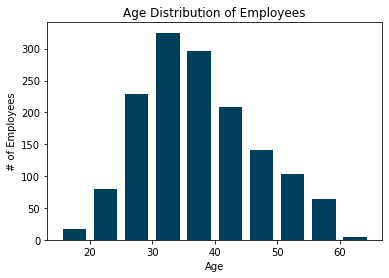

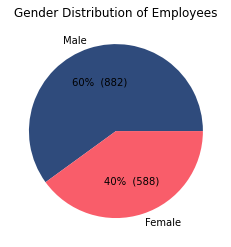

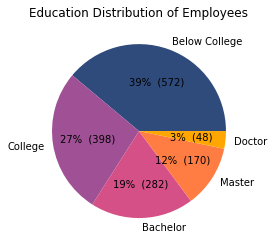

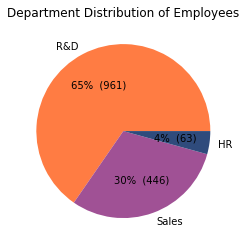

In [58]:
# Demographics
# Age Histogram (5 year buckets)
plt.hist(df['Age'], 
         bins=[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 65], 
         rwidth=0.75, 
         color=blue_1)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('# of Employees')
plt.show()

# Gender Pie Chart
def get_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(df['Gender'].value_counts(), 
        colors=[blue_2, pink_2], 
        labels=['Male', 'Female'], 
        autopct=get_autopct(df['Gender'].value_counts()))
plt.title('Gender Distribution of Employees')
plt.show()

# Education Pie Plot
plt.pie(df['Education'].value_counts(), 
        colors=[blue_2, purple_2, pink_1, orange_1, orange_2], 
        labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], 
        autopct=get_autopct(df['Education'].value_counts()))
plt.title('Education Distribution of Employees')
plt.show()



# Department Pie Plot 
plt.pie(df['Department'].value_counts(),   
        colors=[orange_1, purple_2, blue_2],
        labels=['R&D', 'Sales', 'HR'],
        autopct=get_autopct(df['Department'].value_counts()))
plt.title('Department Distribution of Employees')
plt.show()

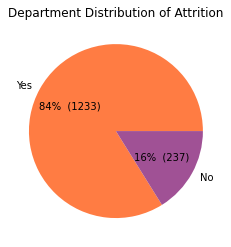

In [59]:
# Distribution of Attrition
plt.pie(df['Attrition'].value_counts(),   
        colors=[orange_1, purple_2],
        labels=['Yes','No'],
        autopct=get_autopct(df['Attrition'].value_counts()))
plt.title('Department Distribution of Attrition')
plt.show()

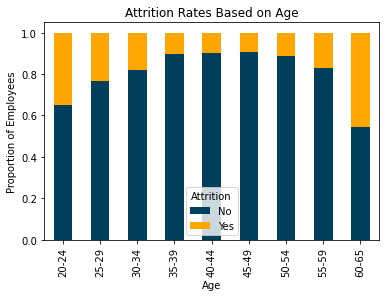

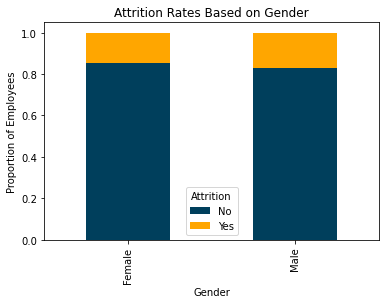

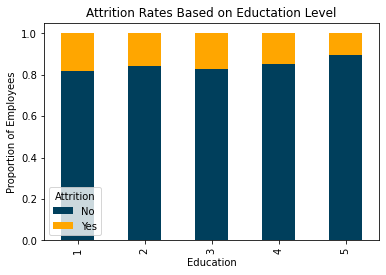

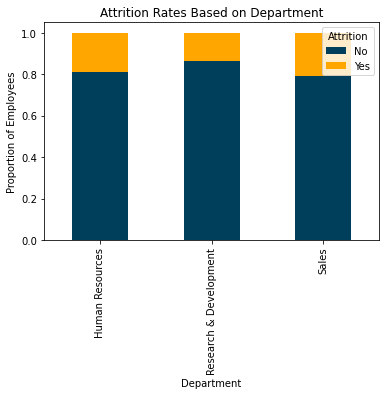

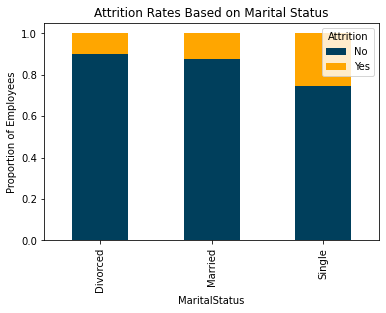

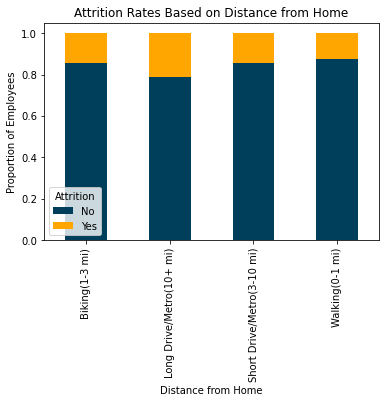

In [60]:
# How Demographics Influence Attrition
# We want a bar chart for each demographic

# Age
def get_age_text(x):
    age_texts = ["20-24", "25-29", "30-34", "35-39","40-44", "45-49", "50-54", "55-59", "60-65"]
    return age_texts[(x-20)//5]
df['Age_text'] = df['Age'].apply(get_age_text)
freq_df = df.groupby(['Age_text'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees",
            xlabel="Age",
            title="Attrition Rates Based on Age");

# Gender
freq_df = df.groupby(['Gender'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Gender");

# Education
freq_df = df.groupby(['Education'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Eductation Level");

# Department
freq_df = df.groupby(['Department'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Department");

# Marital Status
freq_df = df.groupby(['MaritalStatus'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Marital Status");

# Distance from Work
def get_dist_text(x):
    if x <= 1:
        return "Walking(0-1 mi)"
    elif x <= 3:
        return "Biking(1-3 mi)"
    elif x <= 10:
        return "Short Drive/Metro(3-10 mi)"
    return "Long Drive/Metro(10+ mi)"
df['Dist_text'] = df['DistanceFromHome'].apply(get_dist_text)
freq_df = df.groupby(['Dist_text'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees",
            xlabel="Distance from Home",
            title="Attrition Rates Based on Distance from Home");



In [61]:
# Clean/Transform Data

# drop unneccesary columns
df = df.drop(columns=['Over18', 'StandardHours', 'Age_text', 'Dist_text'])

# convert boolean fields into 0's and 1's
df['Attrition'] = np.where(df['Attrition'] == "Yes", 1, 0)
df['Gender'] = np.where(df['Gender'] == "Male", 1, 0)
df['OverTime'] = np.where(df['OverTime'] == "Yes", 1, 0)

Text(0.5, 1.0, 'Demographics Correlation Matrix')

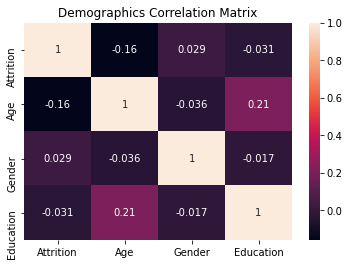

In [62]:
# Correlation Matrix for demographics with attrition
small_df = df[['Attrition', 'Age', 'Gender', 'Education']]
heat_map = sns.heatmap(small_df.corr(), annot=True)
heat_map.set_title("Demographics Correlation Matrix")

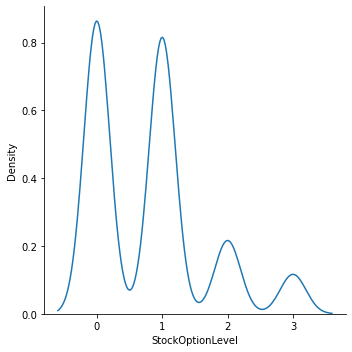

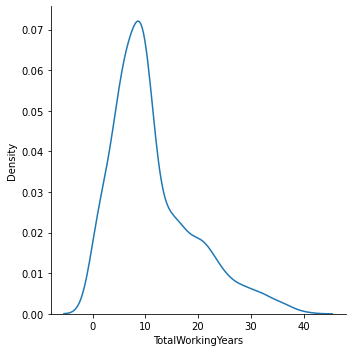

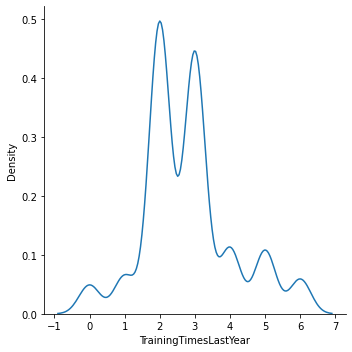

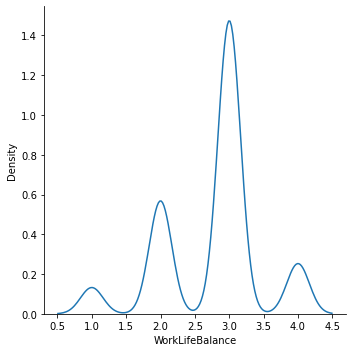

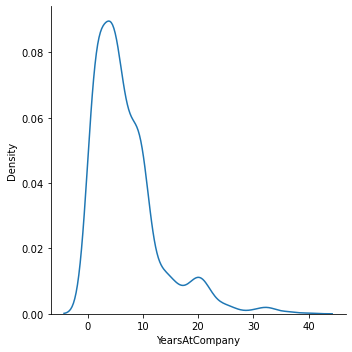

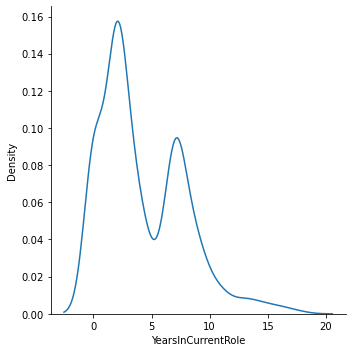

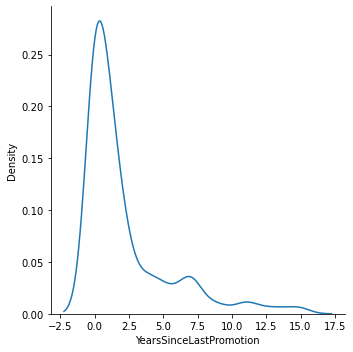

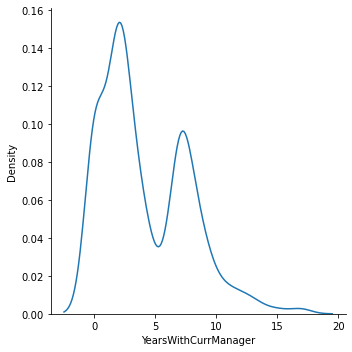

In [63]:
# Density Plots for Work Related Statistics
# StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager
sns.displot(df, x="StockOptionLevel", kind="kde");
sns.displot(df, x="TotalWorkingYears", kind="kde");
sns.displot(df, x="TrainingTimesLastYear", kind="kde");
sns.displot(df, x="WorkLifeBalance", kind="kde");
sns.displot(df, x="YearsAtCompany", kind="kde");
sns.displot(df, x="YearsInCurrentRole", kind="kde");
sns.displot(df, x="YearsSinceLastPromotion", kind="kde");
sns.displot(df, x="YearsWithCurrManager", kind="kde");

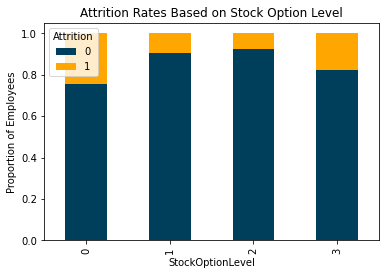

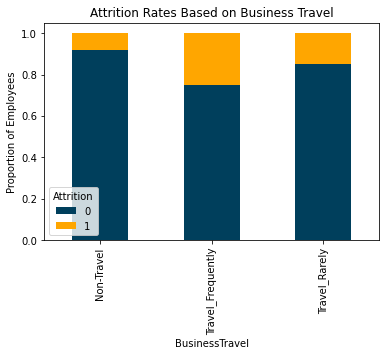

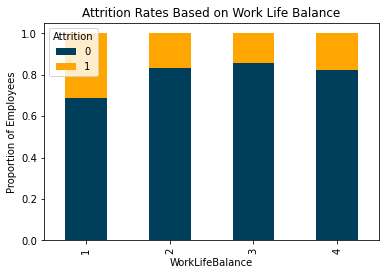

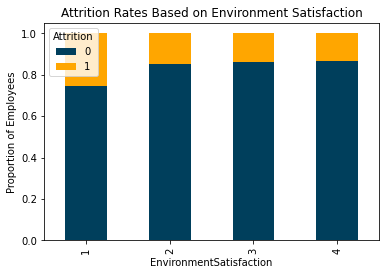

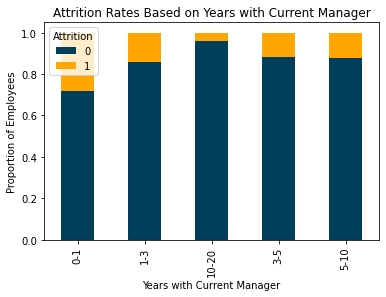

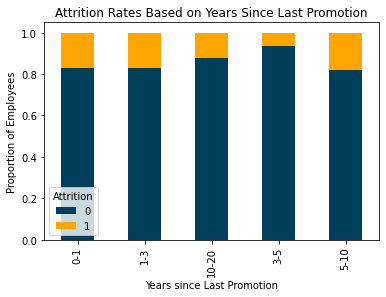

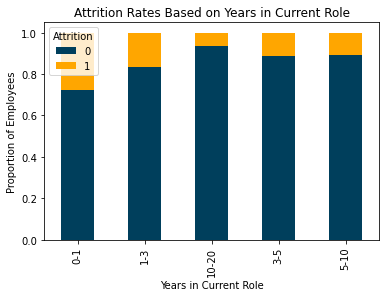

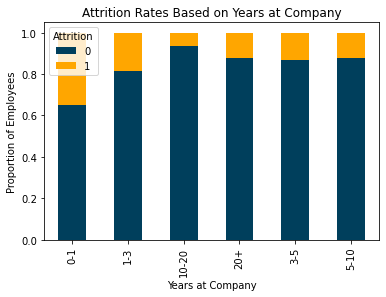

In [64]:
# Plotting Work Related Statistics with Attrition
# Stock Option Level
freq_df = df.groupby(['StockOptionLevel'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Stock Option Level");

# Business Travel
freq_df = df.groupby(['BusinessTravel'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Business Travel");

# Work Life Balance
freq_df = df.groupby(['WorkLifeBalance'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Work Life Balance");

# Enviornment Satisfaction
freq_df = df.groupby(['EnvironmentSatisfaction'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            title="Attrition Rates Based on Environment Satisfaction");

# Helper function
def get_text_years(x):
    if x <= 1:
        return "0-1"
    elif x <= 3:
        return "1-3"
    elif x <= 5:
        return "3-5"
    elif x <= 10:
        return "5-10"
    elif x <= 20:
        return "10-20"
    return "20+"

# Years with Current Manager
df['YearsWithCurrManager_text'] = df['YearsWithCurrManager'].apply(get_text_years)
freq_df = df.groupby(['YearsWithCurrManager_text'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees",
            xlabel="Years with Current Manager",
            title="Attrition Rates Based on Years with Current Manager");

# Years Since Last Promotion
df['YearsSinceLastPromotion_text'] = df['YearsSinceLastPromotion'].apply(get_text_years)
freq_df = df.groupby(['YearsSinceLastPromotion_text'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            xlabel="Years since Last Promotion",
            title="Attrition Rates Based on Years Since Last Promotion");

# Years in Current Role
df['YearsInCurrentRole_text'] = df['YearsInCurrentRole'].apply(get_text_years)
freq_df = df.groupby(['YearsInCurrentRole_text'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            xlabel="Years in Current Role",
            title="Attrition Rates Based on Years in Current Role");

# Years at Company
df['YearsAtCompany_text'] = df['YearsAtCompany'].apply(get_text_years)
freq_df = df.groupby(['YearsAtCompany_text'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees", 
            xlabel="Years at Company",
            title="Attrition Rates Based on Years at Company");



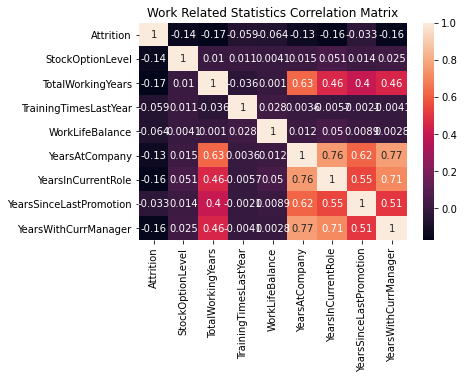

In [65]:
# Correlation Matrix for Work Related Statistics with attrition
small_df = df[['Attrition', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
heat_map = sns.heatmap(small_df.corr(), annot=True)
heat_map.set_title("Work Related Statistics Correlation Matrix");

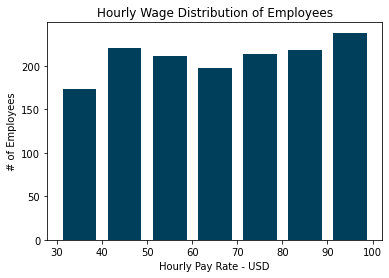

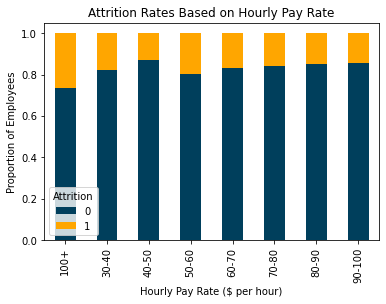

In [66]:
# Salary Analysis
# histogram
plt.hist(df['HourlyRate'],
         bins=[30, 40, 50, 60, 70, 80, 90, 100], 
         rwidth=0.75, 
         color=blue_1)
plt.title('Hourly Wage Distribution of Employees')
plt.xlabel('Hourly Pay Rate - USD')
plt.ylabel('# of Employees')
plt.show()

# Stacked Plot for Salary Ranges
def get_pay_ranges(x):
    pay_ranges = ["30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "100+"]
    return pay_ranges[(x-30)//10]
df['HourlyRate_text'] = df['HourlyRate'].apply(get_pay_ranges)
freq_df = df.groupby(['HourlyRate_text'])['Attrition'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.plot(kind="bar", 
            stacked=True, 
            color=[blue_1, orange_2], 
            ylabel="Proportion of Employees",
            xlabel="Hourly Pay Rate ($ per hour)",
            title="Attrition Rates Based on Hourly Pay Rate");


In [67]:
# drop the text columns that were formed
df = df.drop(columns=['YearsAtCompany_text', 'YearsInCurrentRole_text', 'YearsSinceLastPromotion_text', 'YearsWithCurrManager_text', 'HourlyRate_text'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,4,0,17,3,2,9,6,0,8


In [68]:
# Begin Machine Learning
# Before doing the machine learning we prepare the data

# we need to make dummy variables for all of our categorical variables
df = pd.get_dummies(df)

# now we must split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Attrition'], 
                                                    df['Attrition'], 
                                                    test_size=0.33, 
                                                    random_state=42)

# now, we have to standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,...,0,0,0,0,0,1,0,0,1,0


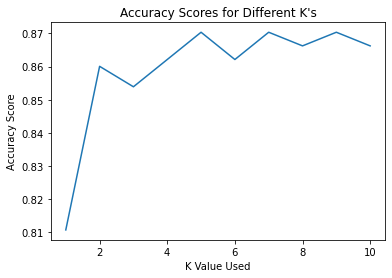

Accuracy Score: 0.8662551440329218


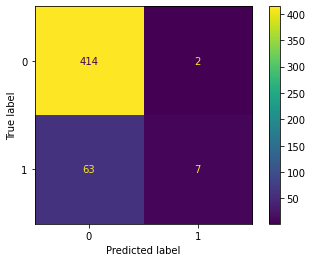

In [69]:
# Start with K nearest neighbor classification

# find the best k
accuracy_scores = []
k_vals = []
for k in range(1,11):
    # create model object
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # fit model
    neigh.fit(X_train, y_train)
    
    # test/evaluate model
    predicted = neigh.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, predicted))
    k_vals.append(k)

# plot accuracy scores
plt.plot(k_vals, accuracy_scores)
plt.title("Accuracy Scores for Different K's")
plt.ylabel("Accuracy Score")
plt.xlabel("K Value Used")
plt.show();

# model using k = 5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
predicted = neigh.predict(X_test)
print("Accuracy Score for k=5:", accuracy_score(y_test, predicted))
plot_confusion_matrix(neigh, X_test, y_test);

Accuracy Score: 0.8744855967078189
Logistic Regression Model Coefficients


,Feature,Coefficient
15,OverTime,0.933584
23,YearsAtCompany,0.731836
14,NumCompaniesWorked,0.567939
25,YearsSinceLastPromotion,0.454916
41,JobRole_Laboratory Technician,0.449780
50,MaritalStatus_Single,0.408910
2,DistanceFromHome,0.351034
10,JobLevel,0.301777
28,BusinessTravel_Travel_Frequently,0.301633
40,JobRole_Human Resources,0.290247


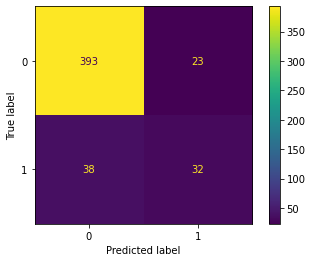

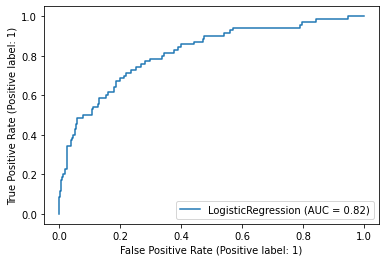

In [74]:
# Logistic Regression
# create model object
lr = LogisticRegression()

# fit model
lr.fit(X_train, y_train)

# test/evaluate model
predicted = lr.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predicted))
plot_confusion_matrix(lr, X_test, y_test);
plot_roc_curve(lr, X_test, y_test);


# dive deeper into model
print("Logistic Regression Model Coefficients")
coef_df = pd.DataFrame({'Feature': df.loc[:, df.columns != 'Attrition'].columns, 
                        'Coefficient': lr.coef_[0]}, columns=['Feature', 'Coefficient'])
coef_df.sort_values(by=['Coefficient'], ascending=False)

Accuracy Score: 0.8827160493827161


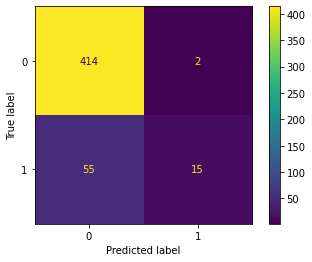

In [71]:
# Support Vector Machines
# create model object
svm_m = svm.SVC()

# fit model
svm_m.fit(X_train, y_train)

# test/evaluate model
predicted = svm_m.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predicted))
plot_confusion_matrix(svm_m, X_test, y_test);